In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
from factor_analyzer import FactorAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42566 sha256=cb283277e27efeff64560059134f6033c04fb010f481ac26623435684166b3c9
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
dataset = pd.read_csv("/content/StandfordB.csv")
dataset.head()

,distant,talkatv,carelss,hardwrk,anxious,agreebl,tense,kind,opposng,relaxed,...,lazy,coopera,quiet,organiz,criticl,lax,laidbck,withdrw,givinup,easygon
0,2,7,1,4,7,8,5,9,5,6,...,7,9,9,5,5,5,7,5,5,8
1,3,8,2,7,5,8,4,8,5,7,...,2,7,6,6,4,3,7,2,2,7
2,6,6,2,5,1,8,2,9,2,8,...,5,8,7,4,5,5,7,6,2,8
3,3,7,6,7,8,8,2,8,3,7,...,3,8,4,7,6,6,6,4,3,7
4,7,3,3,5,8,6,7,2,3,3,...,6,6,7,5,5,3,3,7,5,5


In [ ]:
np.array(list(dataset.columns),dtype=object)

array(['distant', 'talkatv', 'carelss', 'hardwrk', 'anxious', 'agreebl',
       'tense', 'kind', 'opposng', 'relaxed', 'disorgn', 'outgoin',
       'approvn', 'shy', 'discipl', 'harsh', 'persevr', 'friendl',
       'worryin', 'respnsi', 'contrar', 'sociabl', 'lazy', 'coopera',
       'quiet', 'organiz', 'criticl', 'lax', 'laidbck', 'withdrw',
       'givinup', 'easygon'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
dataframe = scaler.fit_transform(dataset)
dataframe = pd.DataFrame(data=dataframe,columns=dataset.columns)
dataframe.head(10)

,distant,talkatv,carelss,hardwrk,anxious,agreebl,tense,kind,opposng,relaxed,...,lazy,coopera,quiet,organiz,criticl,lax,laidbck,withdrw,givinup,easygon
0,-1.042323,0.666972,-1.334658,-2.139329,0.997042,1.00112,0.201716,1.610932,0.715417,0.310563,...,1.492512,1.927977,2.342161,-0.589080,-0.098088,0.551796,0.981571,0.705458,1.499935,1.209778
1,-0.483936,1.264261,-0.781432,0.054855,-0.068838,1.00112,-0.324499,0.817044,0.715417,0.902113,...,-1.153004,0.254507,0.743719,-0.078686,-0.672258,-0.652123,0.981571,-0.993303,-0.435465,0.584031
2,1.191226,0.069684,-0.781432,-1.407935,-2.200598,1.00112,-1.376928,1.610932,-1.164511,1.493662,...,0.434305,1.091242,1.276533,-1.099475,-0.098088,0.551796,0.981571,1.271711,-0.435465,1.209778
3,-0.483936,0.666972,1.431472,0.054855,1.529982,1.00112,-1.376928,0.817044,-0.537868,0.902113,...,-0.623901,1.091242,-0.321908,0.431709,0.476083,1.153756,0.422005,0.139204,0.209668,0.584031
4,1.749613,-1.722182,-0.228206,-1.407935,1.529982,-0.45948,1.254145,-3.946288,-0.537868,-1.464085,...,0.963408,-0.582228,1.276533,-0.589080,-0.098088,-0.652123,-1.256690,1.837965,1.499935,-0.667464
5,1.749613,0.069684,1.984698,-0.676540,0.997042,1.00112,1.254145,0.817044,0.715417,-0.280986,...,0.434305,0.254507,1.809347,-0.078686,0.476083,-0.050163,-0.697125,1.271711,0.854802,0.584031
6,-0.483936,0.069684,2.537924,-0.676540,0.464102,0.27082,-0.850714,-1.564622,-0.537868,0.902113,...,0.963408,-0.582228,-0.321908,-1.099475,0.476083,2.959634,2.100701,-0.993303,0.209668,1.209778
7,1.749613,0.069684,-0.781432,1.517644,0.997042,1.00112,0.727930,0.023155,-1.164511,-0.872535,...,-0.094798,1.091242,0.743719,-0.078686,-0.672258,-0.652123,-1.816255,0.705458,2.145068,-0.041716
8,-1.042323,0.069684,-0.781432,0.786249,-1.667658,0.27082,-0.324499,0.023155,0.088774,1.493662,...,-0.623901,1.091242,0.210906,0.431709,1.050254,-0.652123,0.422005,-0.427050,-1.080598,0.584031
9,0.074452,0.666972,-0.228206,-0.676540,-1.134718,0.27082,-0.850714,0.023155,0.715417,0.310563,...,-0.623901,0.254507,0.210906,-0.078686,-0.098088,-0.652123,-0.697125,0.139204,-0.435465,-0.667464


In [ ]:
chi2,p = calculate_bartlett_sphericity(dataframe)
print("Bartlett Sphe get ricity Test")
print("Chi squared value : ",chi2)
print("p value : ",p)

Bartlett Sphe get ricity Test
Chi squared value :  4009.544922872229
p value :  0.0


In [ ]:
kmo_all,kmo_model = calculate_kmo(dataset)
print("KMO Test Statisitc",kmo_model)

KMO Test Statisitc 0.8429824960221267


In [ ]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=dataframe.shape[1])
fa.fit(dataframe)

FactorAnalyzer(impute='drop', n_factors=32, rotation=None, rotation_kwargs={})

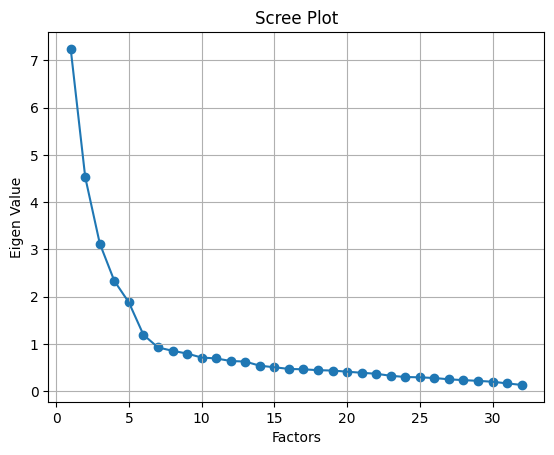

In [ ]:
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,dataframe.shape[1]+1),ev)
plt.plot(range(1,dataframe.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [ ]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(dataset)
with np.printoptions(suppress=True,precision=6):
    load= pd.DataFrame(fa.loadings_,index=dataframe.columns)
load.head()

,0,1,2,3,4,5
distant,0.602104,0.014038,0.068210,-0.123350,0.267972,0.155527
talkatv,-0.752967,0.057709,-0.031133,0.113607,0.148922,0.125759
carelss,0.049726,-0.281849,0.065247,-0.062136,0.210187,0.646609
hardwrk,-0.174566,0.686705,0.135792,0.100152,0.049902,-0.159772
anxious,0.174010,-0.016189,0.690387,0.151628,0.207928,0.126165


In [ ]:
load.sort_values(0, ascending=False)

,0,1,2,3,4,5
quiet,0.790082,-0.156630,0.175569,0.170373,0.024554,-0.038968
withdrw,0.742451,-0.072667,0.123647,-0.101088,0.250070,0.143116
shy,0.705847,-0.235000,0.164623,0.005990,-0.071855,0.013106
distant,0.602104,0.014038,0.068210,-0.123350,0.267972,0.155527
givinup,0.351120,-0.458578,0.219569,-0.094191,0.165770,0.151089
anxious,0.174010,-0.016189,0.690387,0.151628,0.207928,0.126165
lazy,0.169693,-0.673336,0.074439,0.041490,0.178695,0.236267
worryin,0.169317,-0.078914,0.737094,0.058007,0.151900,-0.004633
tense,0.164002,0.033223,0.770176,0.005764,0.257164,0.071961
criticl,0.081317,0.114343,0.147372,-0.101319,0.604259,-0.128670


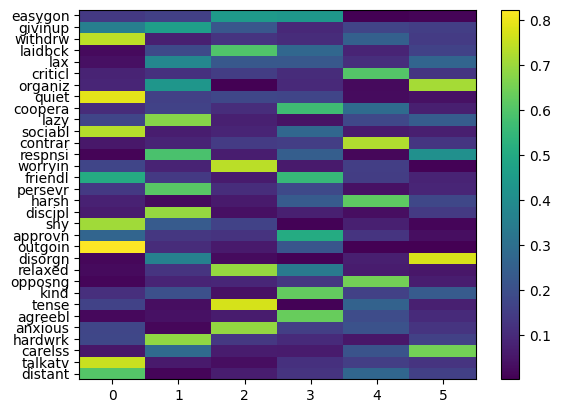

In [ ]:
load
import numpy as np
Z=np.abs(load)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(load.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(load.shape[1])+0.5, minor=False)
ax.set_yticklabels(load.index.values)
ax.set_xticklabels(load.columns.values)
plt.show()

In [ ]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4         5
Variance          4.500258  3.188169  2.973395  2.545142  2.310011  2.157789
Proportional Var  0.140633  0.099630  0.092919  0.079536  0.072188  0.067431
Cumulative Var    0.140633  0.240263  0.333182  0.412718  0.484905  0.552336


In [ ]:
print(pd.DataFrame(fa.get_communalities(),index=dataframe.columns,columns=['Communalities']))

         Communalities
distant       0.478591
talkatv       0.622158
carelss       0.552311
hardwrk       0.558524
anxious       0.589318
agreebl       0.450856
tense         0.692517
kind          0.525152
opposng       0.457260
relaxed       0.616685
disorgn       0.732914
outgoin       0.737626
approvn       0.370597
shy           0.585917
discipl       0.509680
harsh         0.479171
persevr       0.444214
friendl       0.606372
worryin       0.604663
respnsi       0.575010
contrar       0.594960
sociabl       0.630254
lazy          0.577194
coopera       0.457462
quiet         0.710736
organiz       0.713662
criticl       0.433357
lax           0.329547
laidbck       0.498039
withdrw       0.665039
givinup       0.440969
easygon       0.434011
